# Q3

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

In [64]:
df = pd.DataFrame(
{
    'salary' : [1.7,2.4,2.3,3.1,3.7,4.2,4.4,6.1,5.4,5.7,6.4,6.2],
    'experience' : [1.2,1.5,1.9,2.2,2.4,2.5,2.8,3.1,3.3,3.7,4.2,4.4]
})

y = df['salary']
x = df['experience']
x = np.array(x)
y = np.array(y)
n = len(x)
df


,salary,experience
0,1.7,1.2
1,2.4,1.5
2,2.3,1.9
3,3.1,2.2
4,3.7,2.4
5,4.2,2.5
6,4.4,2.8
7,6.1,3.1
8,5.4,3.3
9,5.7,3.7


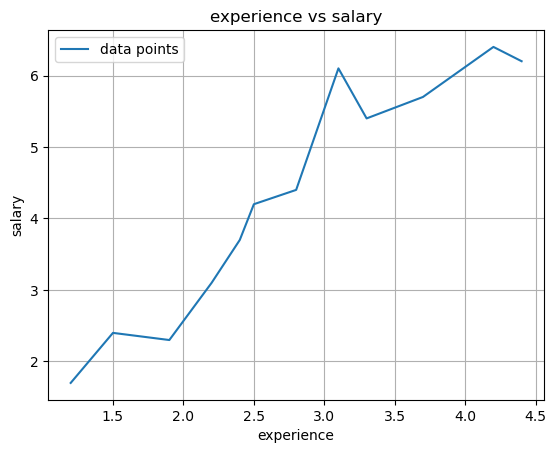

In [58]:
plt.plot(x, y, label="data points")
plt.title("experience vs salary")
plt.xlabel("experience")
plt.ylabel("salary")
plt.legend()
plt.grid()
plt.show()

MSE for beta = 0.1 is 10.81115
MSE for beta = 0.8 is 1.762599999999999
MSE for beta = 1.5 is 1.1404166666666662


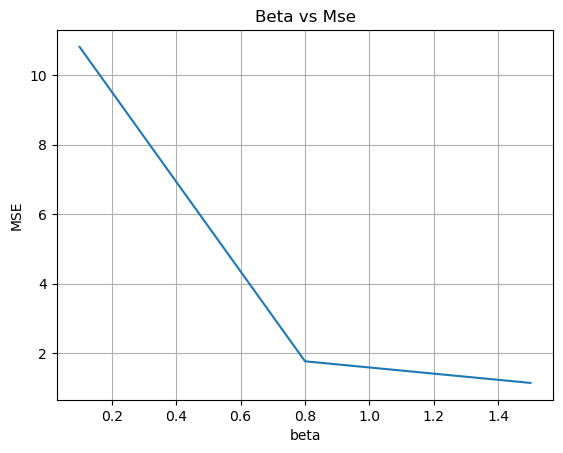

In [59]:
beta = [0.1,0.8,1.5]
intercept = 1.1 
MSE = []
for i in range(3):
    pred = intercept + beta[i] * x
    MSE.append(mean_squared_error(y,pred))
    print(f"MSE for beta = {beta[i]} is {MSE[i]}")


plt.plot(beta, MSE)
plt.title("Beta vs Mse")
plt.xlabel("beta")
plt.ylabel("MSE")
plt.grid()
plt.show()

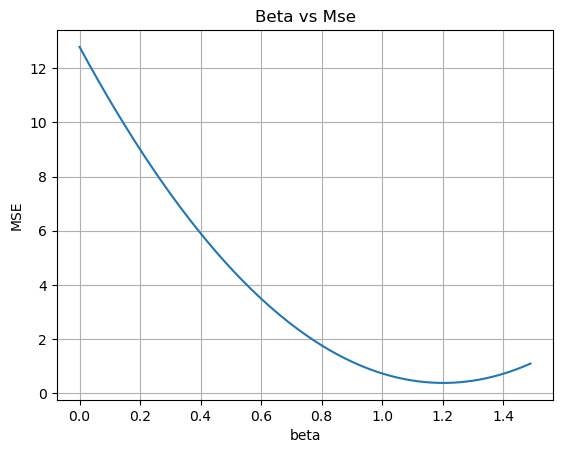

In [60]:
beta = 0
beta_list = []
intercept = 1.1 
MSE = []
while beta <= 1.5:
    beta_list.append(beta)
    pred = intercept + beta * x
    MSE.append(mean_squared_error(y,pred))
    beta += 0.01


plt.plot(beta_list, MSE)
plt.title("Beta vs Mse")
plt.xlabel("beta")
plt.ylabel("MSE")
plt.grid()
plt.show()

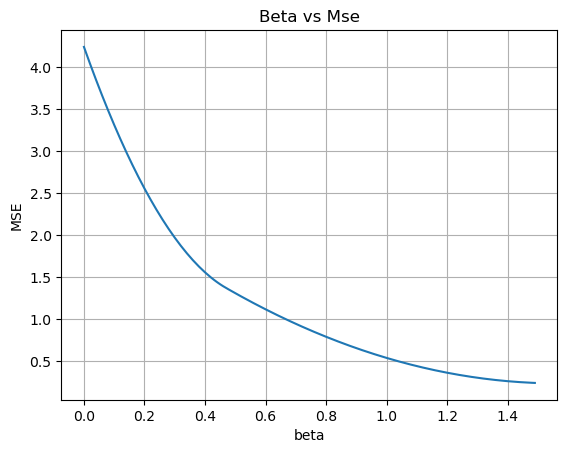

In [77]:
b1 = 0
beta = []
mse = []

while b1 < 1.5:
    b0 = 0
    mse_min = 100
    while b0 < 3:
        pred = b0 + b1*x
        MSE = mean_squared_error(y,pred)
        mse_min = min(MSE, mse_min)
        b0 += 0.01
    mse.append(mse_min)
    beta.append(b1)
    b1 += 0.01
    

plt.plot(beta, mse)
plt.title("Beta vs Mse")
plt.xlabel("beta")
plt.ylabel("MSE")
plt.grid()
plt.show()

In [85]:
model = SGDRegressor()
model.fit(x.reshape(-1,1), y)

Y_pred = model.predict(x.reshape(-1,1))

mse_sklearn = mean_squared_error(y, Y_pred)

beta_sklearn = model.coef_[0]
intercept_sklearn = model.intercept_

print(f"Scikit-learn results:\nMSE: {mse_sklearn:.4f}\nSlope (beta): {beta_sklearn:.4f}\nIntercept (b): {intercept_sklearn}")

Scikit-learn results:
MSE: 0.2561
Slope (beta): 1.4167
Intercept (b): [0.41265871]


# Q4

In [92]:
np.random.seed(0)
B0 = np.random.rand()
B1 = np.random.rand()
learning_rate = 0.01
epochs = 5
iterations = 60

errors = []

def compute_error(B0, B1, x, y):
    predictions = B0 + B1 * x
    return np.mean((y - predictions) ** 2)

for epoch in range(epochs):
    for i in range(len(x)):
        Y_pred = B0 + B1 * x[i]
        error = Y_pred - y[i]
        
        B0 = B0 - learning_rate * error
        B1 = B1 - learning_rate * error * x[i]
        current_error = compute_error(B0, B1, x, y)
        errors.append(current_error)

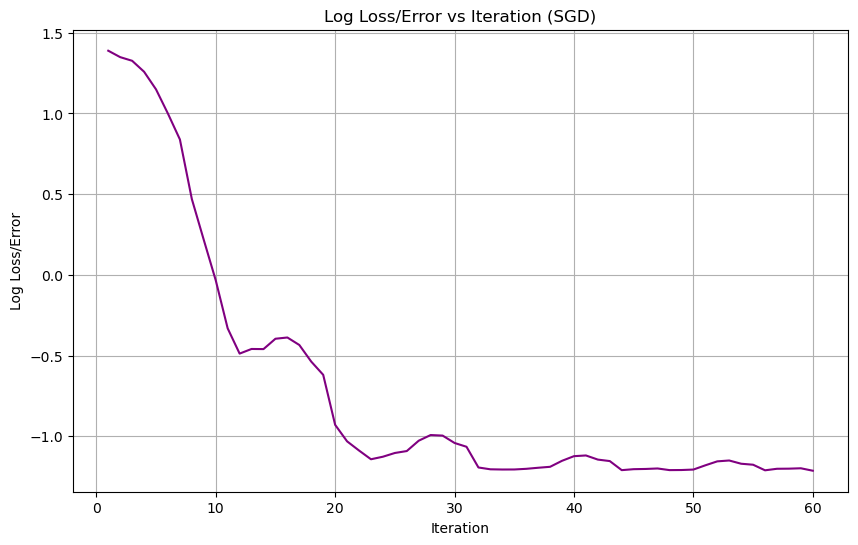

(0.7244618697517251, 1.3230764573843905, 0.29709301438851604)

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(errors) + 1), np.log(errors), color='purple')
plt.xlabel('Iteration')
plt.ylabel('Log Loss/Error')
plt.title('Log Loss/Error vs Iteration (SGD)')
plt.grid(True)
plt.show()

B0, B1, errors[-1]

In [95]:
sgd_reg = SGDRegressor(max_iter=iterations, eta0=learning_rate, penalty=None, tol=1e-6)

X_reshaped = x.reshape(-1, 1)
sgd_reg.fit(X_reshaped, y)

B0_sklearn = sgd_reg.intercept_[0]
B1_sklearn = sgd_reg.coef_[0]

Y_pred_sklearn = sgd_reg.predict(X_reshaped)
error_sklearn = mean_squared_error(y, Y_pred_sklearn)

B0_sklearn, B1_sklearn, error_sklearn

/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


(0.39233663023621634, 1.4297465353679801, 0.25377504626681635)

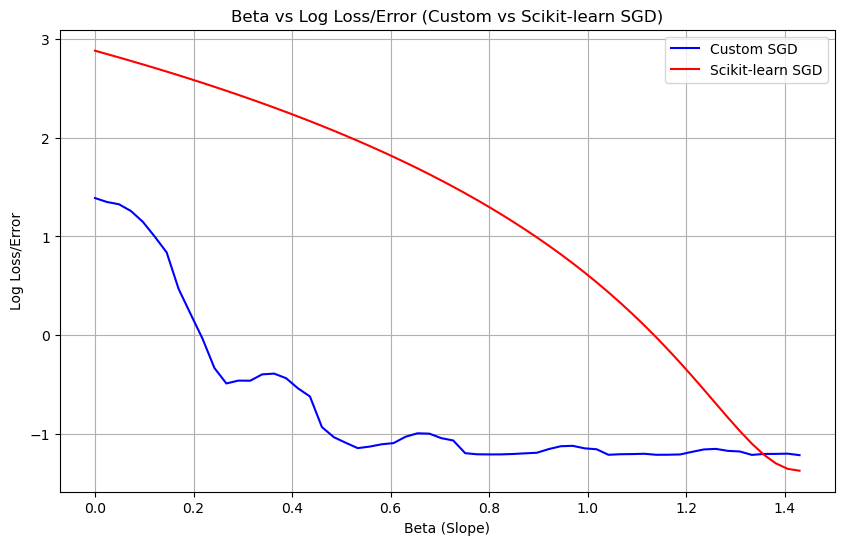

In [97]:
beta_range = np.linspace(0, B1_sklearn, len(errors))
log_error_sklearn = [np.log(compute_error(B0_sklearn, beta, x,y)) for beta in beta_range]

plt.figure(figsize=(10, 6))
plt.plot(beta_range, np.log(errors), color='blue', label='Custom SGD')
plt.plot(beta_range, log_error_sklearn, color='red', label='Scikit-learn SGD')
plt.xlabel('Beta (Slope)')
plt.ylabel('Log Loss/Error')
plt.title('Beta vs Log Loss/Error (Custom vs Scikit-learn SGD)')
plt.legend()
plt.grid(True)
plt.show()

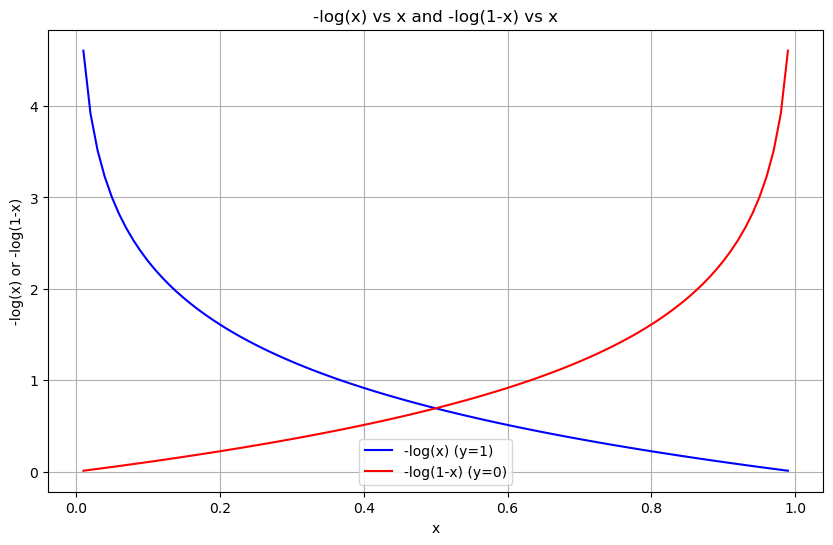

In [98]:
x_values = np.linspace(0.01, 0.99, 100)

log_x = -np.log(x_values)
log_1_x = -np.log(1 - x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, log_x, color='blue', label='-log(x) (y=1)')
plt.plot(x_values, log_1_x, color='red', label='-log(1-x) (y=0)')
plt.xlabel('x')
plt.ylabel('-log(x) or -log(1-x)')
plt.title('-log(x) vs x and -log(1-x) vs x')
plt.legend()
plt.grid(True)
plt.show()

# Q5

In [100]:
def compute_mse(B0, B1, x, y):
    predictions = B0 + B1 * x
    return np.mean((y - predictions) ** 2)

def gradient_descent(X, Y, learning_rate=0.01, epochs=100):
    B0 = np.random.rand()  
    B1 = np.random.rand() 
    mse_values = []
    slopes = []

    for _ in range(epochs):
        Y_pred = B0 + B1 * x
        error = y - Y_pred

        B0 = B0 + learning_rate * np.sum(error)
        B1 = B1 + learning_rate * np.sum(error * x)

        mse = compute_mse(B0, B1, x, y)
        mse_values.append(mse)
        slopes.append(B1)

    return slopes, mse_values

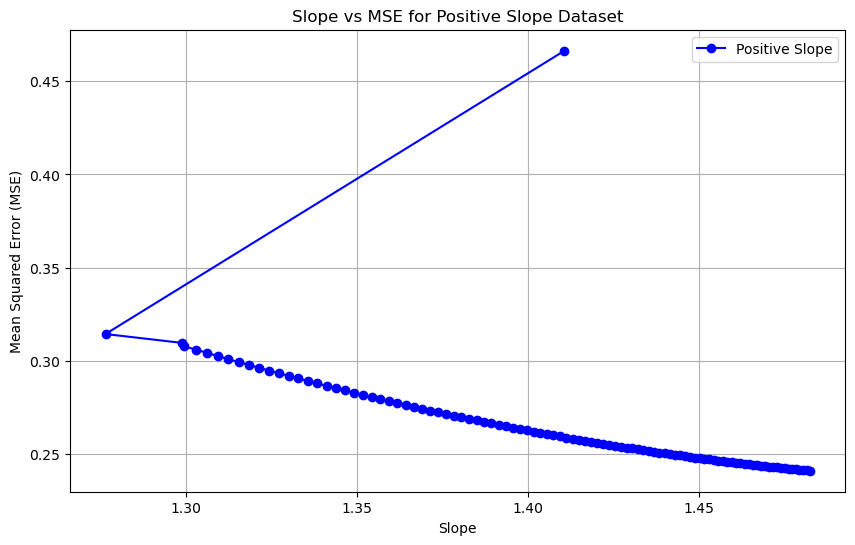

In [101]:
X_pos = np.array([1, 2, 4, 3, 5])
Y_pos = np.array([1, 3, 3, 2, 5])

X_neg = np.array([1, 2, 3, 4, 5])
Y_neg = np.array([10, 8, 6, 4, 2])

slopes_pos, mse_values_pos = gradient_descent(X_pos, Y_pos)
slopes_neg, mse_values_neg = gradient_descent(X_neg, Y_neg)

plt.figure(figsize=(10, 6))
plt.plot(slopes_pos, mse_values_pos, color='blue', marker='o', linestyle='-', label='Positive Slope')
plt.xlabel('Slope')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Slope vs MSE for Positive Slope Dataset')
plt.grid(True)
plt.legend()
plt.show()

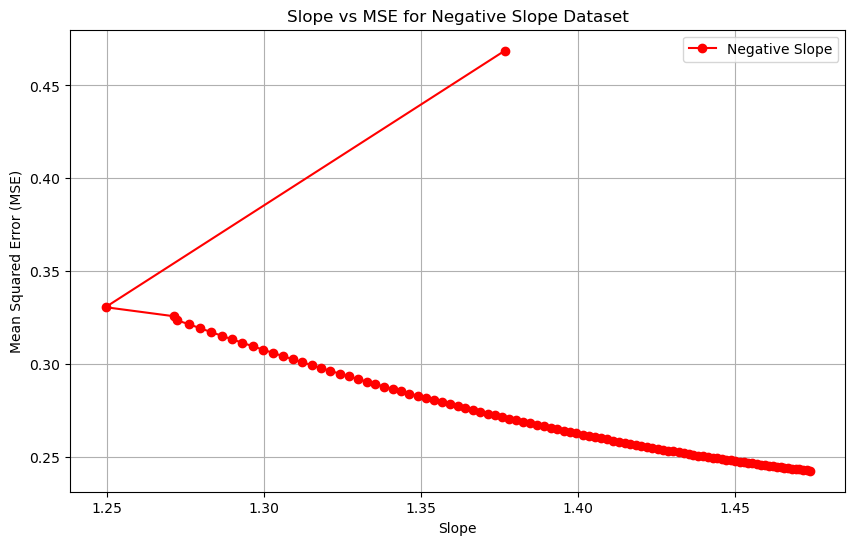

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(slopes_neg, mse_values_neg, color='red', marker='o', linestyle='-', label='Negative Slope')
plt.xlabel('Slope')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Slope vs MSE for Negative Slope Dataset')
plt.grid(True)
plt.legend()
plt.show()

# Additional Questions
## Q1

In [103]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_log_loss(B0, B1, X, Y):
    predictions = sigmoid(B0 + B1 * X)
    return -np.mean(Y * np.log(predictions) + (1 - Y) * np.log(1 - predictions))

def gradient_descent_logistic(X, Y, learning_rate=0.1, epochs=100):
    B0 = np.random.rand() 
    B1 = np.random.rand() 
    log_loss_values = []
    slopes = []
    
    for _ in range(epochs):
        Y_pred = sigmoid(B0 + B1 * X)
        error = Y - Y_pred

        B0 = B0 + learning_rate * np.sum(error)
        B1 = B1 + learning_rate * np.sum(error * X)

        log_loss = compute_log_loss(B0, B1, X, Y)
        log_loss_values.append(log_loss)
        slopes.append(B1)

    return slopes, log_loss_values

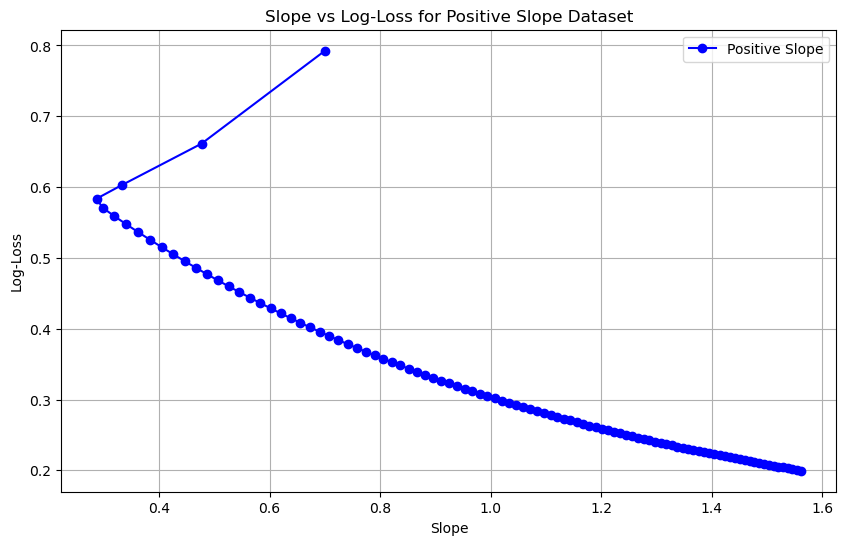

In [104]:
X_pos = np.array([1, 2, 3, 4, 5])
Y_pos = np.array([0, 0, 1, 1, 1])

X_neg = np.array([1, 2, 3, 4, 5])
Y_neg = np.array([1, 1, 0, 0, 0])

slopes_pos, log_loss_values_pos = gradient_descent_logistic(X_pos, Y_pos)
slopes_neg, log_loss_values_neg = gradient_descent_logistic(X_neg, Y_neg)

plt.figure(figsize=(10, 6))
plt.plot(slopes_pos, log_loss_values_pos, color='blue', marker='o', linestyle='-', label='Positive Slope')
plt.xlabel('Slope')
plt.ylabel('Log-Loss')
plt.title('Slope vs Log-Loss for Positive Slope Dataset')
plt.grid(True)
plt.legend()
plt.show()


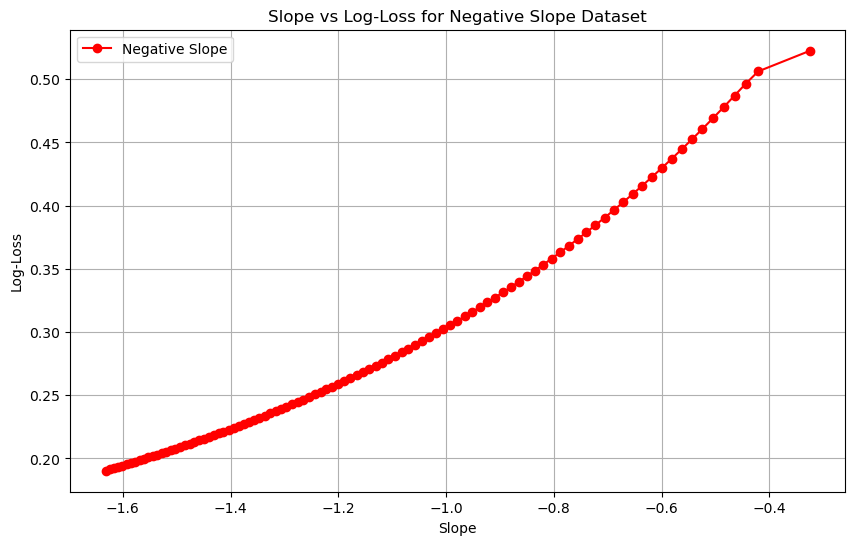

In [105]:
plt.figure(figsize=(10, 6))
plt.plot(slopes_neg, log_loss_values_neg, color='red', marker='o', linestyle='-', label='Negative Slope')
plt.xlabel('Slope')
plt.ylabel('Log-Loss')
plt.title('Slope vs Log-Loss for Negative Slope Dataset')
plt.grid(True)
plt.legend()
plt.show()